In [68]:
import numpy as np
import scipy.stats as stats
from scipy.stats import beta
import matplotlib.pyplot as plot

h = lambda x : x > 3
f = lambda x : stats.norm().pdf(x)
g = lambda x : stats.norm(loc=4,scale=1.0).pdf(x)

In [69]:
def monte_carlo_sim(N, loc, scale):
    X = np.random.normal(loc,scale,size=N)
    return 1./N * np.sum(h(X))


In [78]:
def cdf_method(N, loc, scale):
    return 1 - stats.norm(0,1).cdf(3)

In [71]:


def generate_F_samples(N):
    return stats.norm().rvs(N)


In [72]:
def importance_sampling(N, real_f):
    #Importance distribution
    X = np.random.normal(loc=4,scale=1,size=N)
    return 1./N * np.sum((h(X)*real_f(X))/g(X))

In [73]:
def estimate_fitting(N):
    x = generate_F_samples(N)
    loc,scale = stats.norm.fit(x)
    return [loc,scale]

In [74]:
monte_carlo_sim(10000, 0 ,1)

0.0016

In [75]:
importance_sampling(10000, f, 4 , 1)

TypeError: importance_sampling() takes 2 positional arguments but 4 were given

In [81]:
datapoints = []
is_classic = []
is_estimated = []
mc_classic = []
mc_estimated = []
cdf = []
for i in range(100,50000, 1000):
    datapoints.append(i)
    vals = estimate_fitting(i)
    f_est = lambda x : stats.norm(loc=vals[0],scale=vals[1]).pdf(x)
    cdf.append(cdf_method(i, vals[0] , vals[1]))
    is_classic.append(importance_sampling(i, f))
    is_estimated.append(importance_sampling(i, f_est))
    mc_classic.append(monte_carlo_sim(i, 0, 1))
    mc_estimated.append(monte_carlo_sim(i, vals[0], vals[1]))



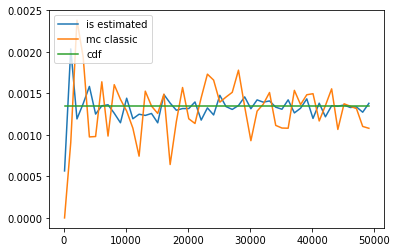

In [82]:
fig = plot.figure()
#plot.plot(datapoints, is_classic, label="is_classic")
plot.plot(datapoints, is_estimated, label="is estimated")
plot.plot(datapoints, mc_classic, label="mc classic")
#plot.plot(datapoints, mc_estimated, label="mc estimated")
plot.plot(datapoints, cdf, label="cdf")
plot.legend(loc="upper left")